***Hotel Reservation Cancellation Prediction***

Group Members:

Sakshi Lade (202201040218)

Palak Yerawar (202201040195)

Surabhi Kharakte (202201040215)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix, classification_report, silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

In [ ]:
# Load dataset
hotel = '/content/Hotel Reservations cancellation prediction.csv'
data = pd.read_csv(hotel)
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [ ]:
#Checking the shape of the dataset
data.shape

(36275, 19)

In [ ]:
#Dropping the identifier column
data.drop(['Booking_ID'], axis=1, inplace=True)

In [ ]:
data['date of arrival'] = data['arrival_year'].astype(str) + '/' + data['arrival_month'].astype(str) + '/' + data['arrival_date'].astype(str)

#type casting the date column
data['date of arrival'] = pd.to_datetime(data['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)

#dropping the columns
data.drop(columns=['arrival_date', 'arrival_month', 'arrival_year'], inplace=True)

<ipython-input-6-3062d2206b29>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['date of arrival'] = pd.to_datetime(data['date of arrival'],format='mixed', infer_datetime_format=True, errors='coerce',yearfirst=True)


In [ ]:
#checking for null values
data.isnull().sum()

,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
market_segment_type,0
repeated_guest,0


In [ ]:
data.dropna(inplace=True)
data.reset_index()

,index,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36233,36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,Online,0,0,0,167.80,1,Not_Canceled,2018-08-03
36234,36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,Online,0,0,0,90.95,2,Canceled,2018-10-17
36235,36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,Online,0,0,0,98.39,2,Not_Canceled,2018-07-01
36236,36273,2,0,0,3,Not Selected,0,Room_Type 1,63,Online,0,0,0,94.50,0,Canceled,2018-04-21


In [ ]:
#checking data types
data.dtypes

,0
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
market_segment_type,object
repeated_guest,int64


In [ ]:
data['avg_price_per_room'].replace(0,data['avg_price_per_room'].mean(), inplace=True)

<ipython-input-10-872c22178c9b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['avg_price_per_room'].replace(0,data['avg_price_per_room'].mean(), inplace=True)


In [ ]:
#drop where adults are 0
data.drop(data[data['no_of_adults'] == 0].index, inplace = True)

In [ ]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date of arrival
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [ ]:
# 1: Statistical Summary and Data Exploration
# Check if 'Booking_ID' exists in the columns, if not, print available columns
if 'Booking_ID' in data.columns:
    data_cleaned = data.drop(columns=['Booking_ID'])
else:
    print(f"'Booking_ID' column not found. Available columns are: {data.columns.tolist()}")
    # Handle the case where 'Booking_ID' is not found,
    # e.g., skip dropping or use a different column
    data_cleaned = data  # Or choose another approach

print("Statistical Summary:")
print(data_cleaned.describe())

print("\nMissing Values:")
print(data_cleaned.isnull().sum())

'Booking_ID' column not found. Available columns are: ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'booking_status', 'date of arrival']
Statistical Summary:
       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36099.000000    36099.000000          36099.000000       36099.000000   
mean       1.852406        0.097814              0.810022           2.203496   
min        1.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
m

Exploratory Data Analysis (EDA)

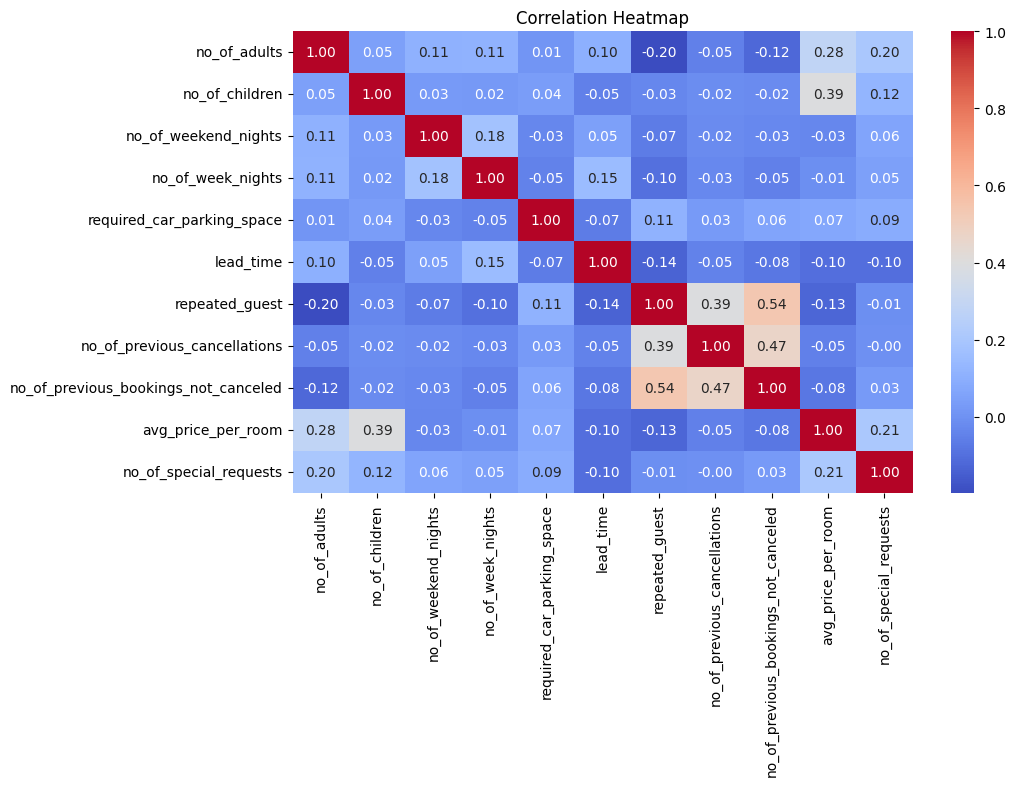

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Univariate Analysis

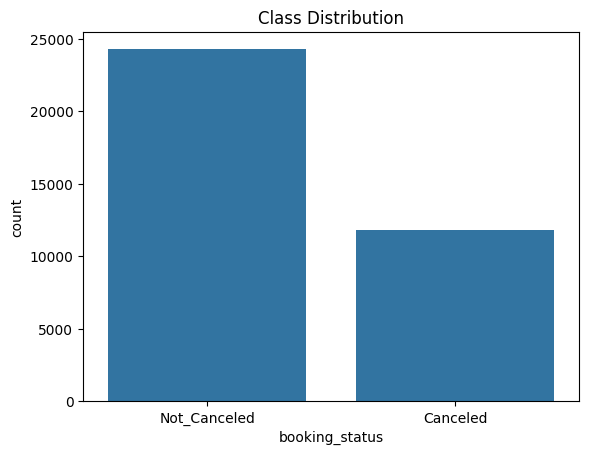

In [ ]:
# Data Analysis
sns.countplot(x='booking_status', data=data_cleaned)
plt.title("Class Distribution")
plt.show()


Text(0.5, 1.0, 'Number of Children')

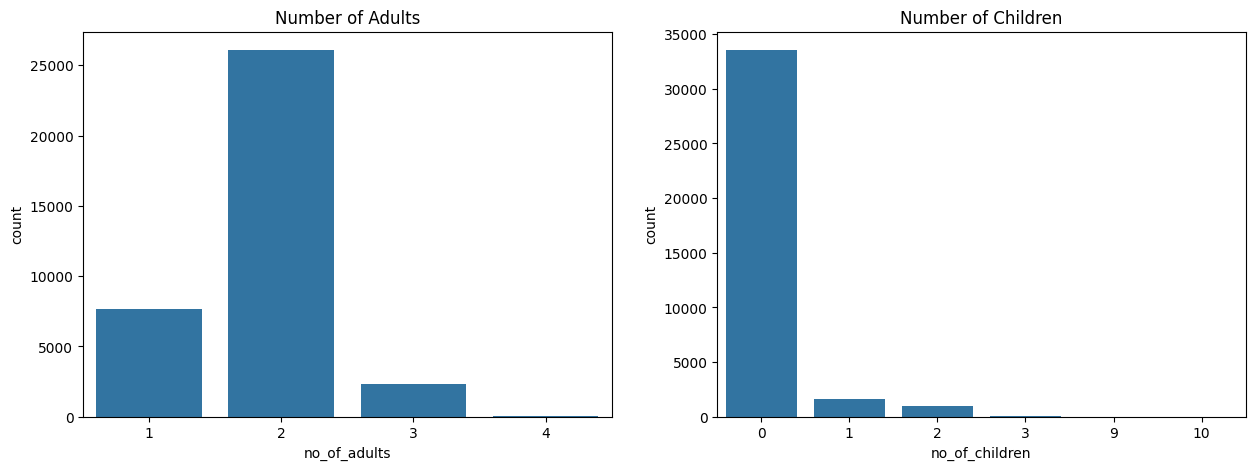

In [ ]:
fig, ax = plfig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot( x = 'no_of_adults', data = data, ax=ax[0]).set_title('Number of Adults')
sns.countplot( x = 'no_of_children', data = data, ax=ax[1]).set_title('Number of Children')

Text(0.5, 1.0, 'Number of Week Nights')

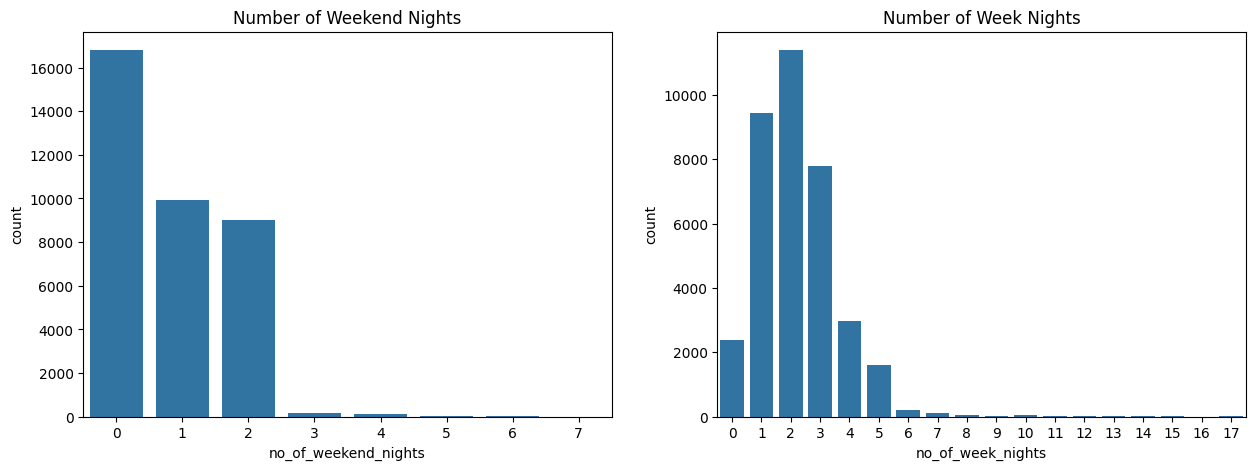

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = data, ax=ax[0]).set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = data, ax=ax[1]).set_title('Number of Week Nights')

Text(0.5, 1.0, 'Market Segment Type')

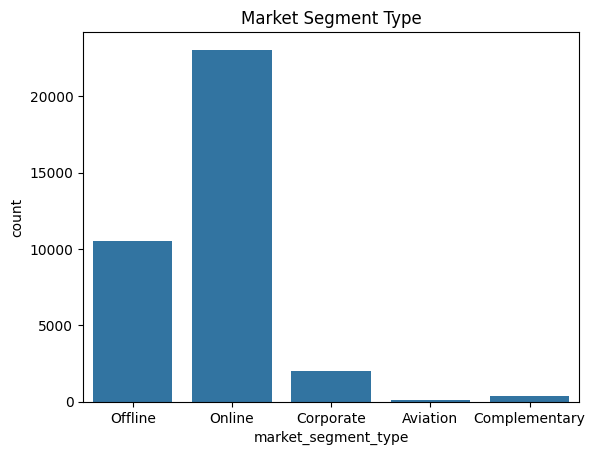

In [ ]:
sns.countplot(x = 'market_segment_type', data = data).set_title('Market Segment Type')


Text(0.5, 1.0, 'Average Room Price')

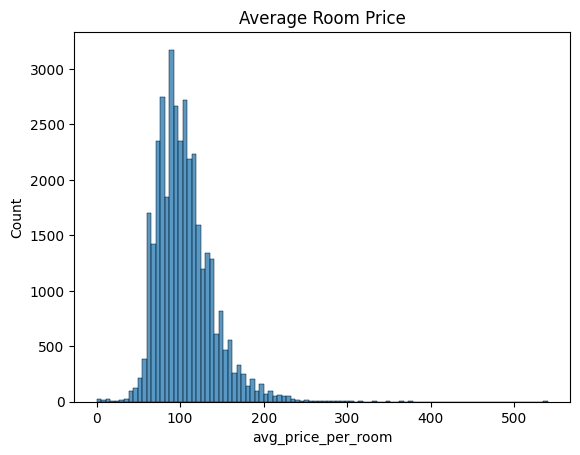

In [ ]:
sns.histplot(x = 'avg_price_per_room', data = data, bins = 100).set_title('Average Room Price')

Text(0.5, 1.0, 'Lead Time in days')

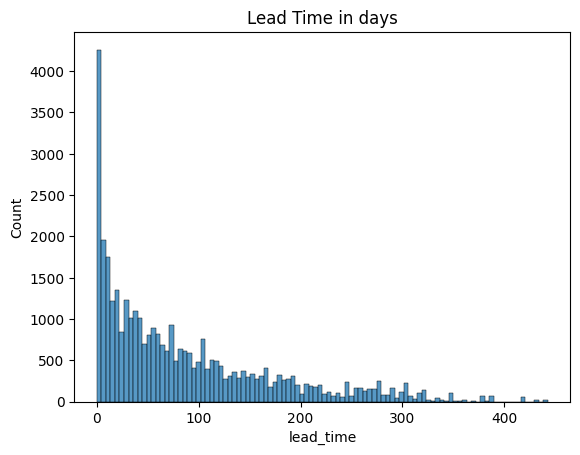

In [ ]:
sns.histplot(x = 'lead_time', data = data, bins=100).set_title('Lead Time in days')

Text(0.5, 1.0, 'Number of Week Nights')

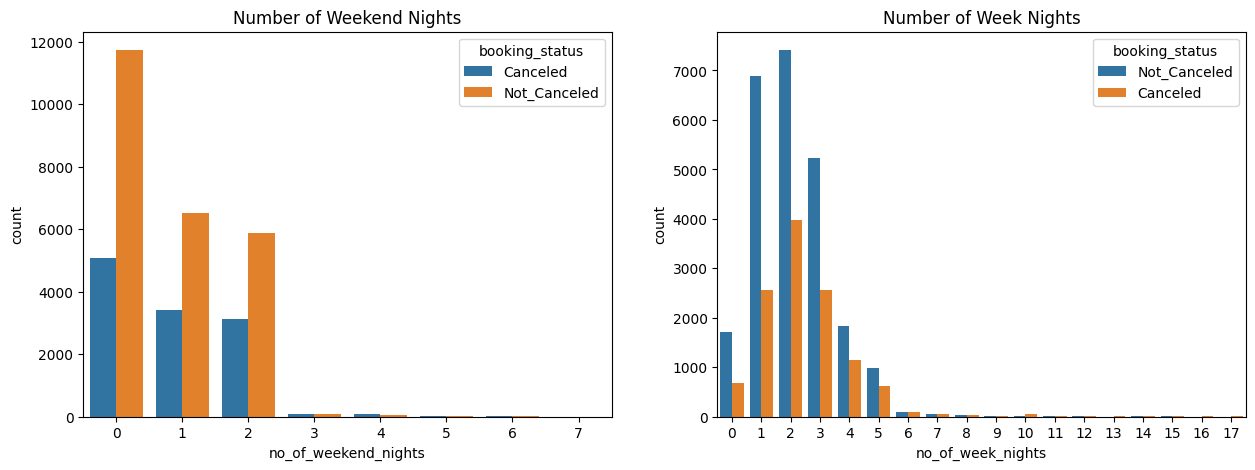

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'no_of_weekend_nights', data = data, ax=ax[0], hue = 'booking_status').set_title('Number of Weekend Nights')
sns.countplot(x = 'no_of_week_nights', data = data, ax=ax[1], hue = 'booking_status').set_title('Number of Week Nights')

Bivariate Analysis

<Axes: >

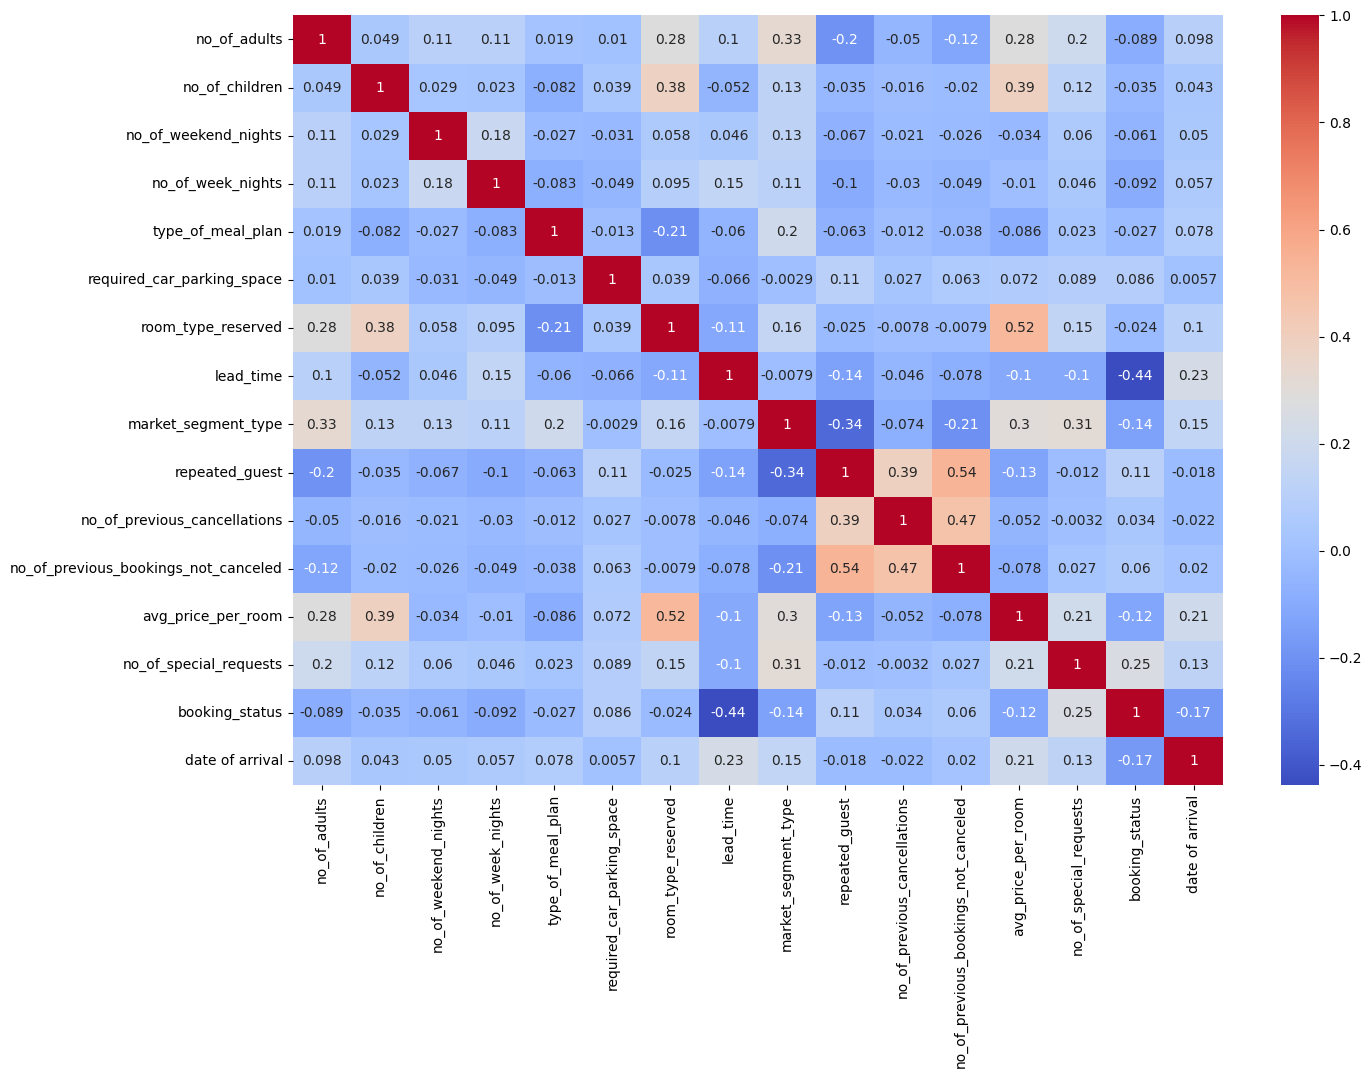

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

Data Preparation (feature encoding and feature scaling)

In [ ]:
# 2. Data Preparation
categorical_columns = data_cleaned.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data_cleaned[col] = label_encoders[col].fit_transform(data_cleaned[col])

X = data_cleaned.drop(columns=['booking_status', 'avg_price_per_room'])
y_classification = data_cleaned['booking_status']
y_regression = data_cleaned['avg_price_per_room']

# Convert datetime columns to numerical representation before scaling
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].astype(np.int64)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Data Splitting

In [ ]:
# 3.Data Splitting
# Check if 'Booking_ID' exists in the columns before dropping
if 'Booking_ID' in data.columns:
    X = data.drop(columns=["booking_status", "Booking_ID"])
else:
    print("'Booking_ID' not found in columns, proceeding without dropping it.")
    X = data.drop(columns=["booking_status"])  # Drop only 'booking_status'

y_classification = data["booking_status"]

categorical_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Convert datetime columns to numerical representation before scaling
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = pd.to_numeric(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y_classification, test_size=0.2, random_state=42)

'Booking_ID' not found in columns, proceeding without dropping it.


Training of model=

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
# Optimized Models for Faster Execution
models = {
    "Logistic Regression": LogisticRegression(max_iter=500, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(n_estimators=50, n_jobs=-1, use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, predictions)  # Evaluate accuracy
    results[name] = accuracy  # Store the result

    print(f"\n{name} Results:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:\n", classification_report(y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

# Best Model Selection
print("\nModel Performance:")
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.2f}")

best_model_name = max(results, key=results.get)
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]:.2f}")



Training Logistic Regression...

Logistic Regression Results:
Accuracy: 0.68


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2303
           1       0.68      1.00      0.81      4917

    accuracy                           0.68      7220
   macro avg       0.34      0.50      0.41      7220
weighted avg       0.46      0.68      0.55      7220

Confusion Matrix:
 [[   0 2303]
 [   0 4917]]

Training Decision Tree...

Decision Tree Results:
Accuracy: 0.87
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.80      2303
           1       0.91      0.90      0.90      4917

    accuracy                           0.87      7220
   macro avg       0.85      0.86      0.85      7220
weighted avg       0.87      0.87      0.87      7220

Confusion Matrix:
 [[1881  422]
 [ 513 4404]]

Training Random Forest...

Random Forest Results:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   supp

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:19:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82      2303
           1       0.90      0.94      0.92      4917

    accuracy                           0.89      7220
   macro avg       0.88      0.86      0.87      7220
weighted avg       0.89      0.89      0.89      7220

Confusion Matrix:
 [[1799  504]
 [ 310 4607]]

Training Bagging...

Bagging Results:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      2303
           1       0.92      0.93      0.93      4917

    accuracy                           0.90      7220
   macro avg       0.89      0.88      0.88      7220
weighted avg       0.90      0.90      0.90      7220

Confusion Matrix:
 [[1906  397]
 [ 322 4595]]

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



AdaBoost Results:
Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.70      2303
           1       0.85      0.89      0.87      4917

    accuracy                           0.82      7220
   macro avg       0.80      0.78      0.79      7220
weighted avg       0.82      0.82      0.82      7220

Confusion Matrix:
 [[1534  769]
 [ 524 4393]]

Model Performance:
Logistic Regression: 0.68
Decision Tree: 0.87
Random Forest: 0.90
Gradient Boosting: 0.85
K-Nearest Neighbors: 0.80
XGBoost: 0.89
Bagging: 0.90
AdaBoost: 0.82

Best Model: Random Forest with accuracy: 0.90


Cross Validation nad Optimazation


Best Model: Random Forest with accuracy: 0.9023545706371191

Cross-validation scores for Random Forest: [0.89875346 0.90110803 0.89875346 0.90235457 0.89873944]
Mean CV Score: 0.90


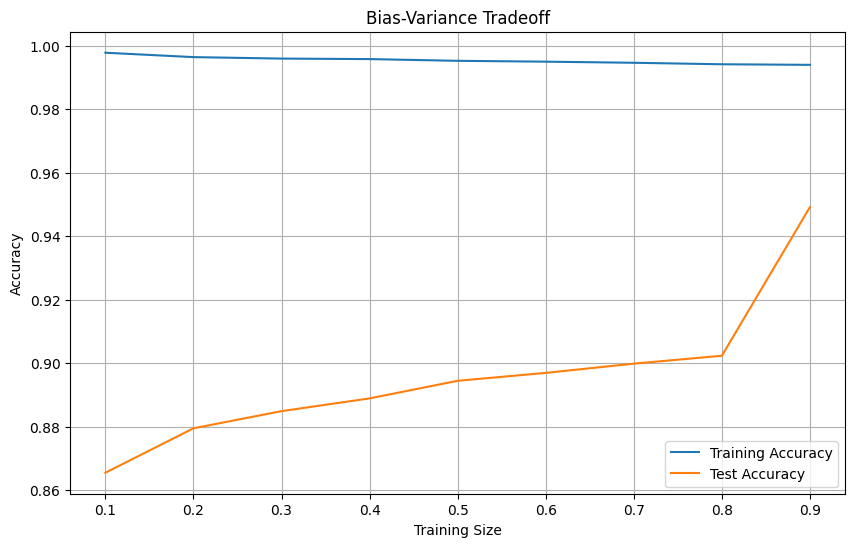

In [ ]:
# 5: Optimization and Cross-Validation
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy: {results[best_model_name]}")

cv_scores = cross_val_score(best_model, X, y_classification, cv=5)
print(f"\nCross-validation scores for {best_model_name}: {cv_scores}")
print(f"Mean CV Score: {np.mean(cv_scores):.2f}")

# Variance Analysis
train_sizes = np.linspace(0.1, 0.9, 9)
train_scores, test_scores = [], []

for train_size in train_sizes:
    X_train_part, _, y_train_part, _ = train_test_split(
        X, y_classification, train_size=train_size, random_state=42
    )
    best_model.fit(X_train_part, y_train_part)
    train_scores.append(best_model.score(X_train_part, y_train_part))
    test_scores.append(best_model.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, label="Training Accuracy")
plt.plot(train_sizes, test_scores, label="Test Accuracy")
plt.title("Bias-Variance Tradeoff")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ( classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)

# evaluate models
evaluation_metrics = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Metrics calculation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Storing metrics
    evaluation_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Print evaluation results
    print(f"\n--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")

summary_df = pd.DataFrame(evaluation_metrics).T
print("\n--- Model Performance Summary ---")
print(summary_df)

best_model_name = summary_df['F1 Score'].idxmax()
print(f"\nBest Model based on F1 Score: {best_model_name}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



--- Logistic Regression ---
Accuracy: 0.6810
Precision: 0.4638
Recall: 0.6810
F1 Score: 0.5518
Confusion Matrix:
[[   0 2303]
 [   0 4917]]

--- Decision Tree ---
Accuracy: 0.8705
Precision: 0.8721
Recall: 0.8705
F1 Score: 0.8711
Confusion Matrix:
[[1881  422]
 [ 513 4404]]

--- Random Forest ---
Accuracy: 0.9024
Precision: 0.9014
Recall: 0.9024
F1 Score: 0.9014
Confusion Matrix:
[[1872  431]
 [ 274 4643]]

--- Gradient Boosting ---
Accuracy: 0.8486
Precision: 0.8460
Recall: 0.8486
F1 Score: 0.8453
Confusion Matrix:
[[1596  707]
 [ 386 4531]]

--- K-Nearest Neighbors ---
Accuracy: 0.8001
Precision: 0.7948
Recall: 0.8001
F1 Score: 0.7953
Confusion Matrix:
[[1404  899]
 [ 544 4373]]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:20:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost ---
Accuracy: 0.8873
Precision: 0.8860
Recall: 0.8873
F1 Score: 0.8859
Confusion Matrix:
[[1799  504]
 [ 310 4607]]

--- Bagging ---
Accuracy: 0.9004
Precision: 0.8997
Recall: 0.9004
F1 Score: 0.9000
Confusion Matrix:
[[1906  397]
 [ 322 4595]]


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



--- AdaBoost ---
Accuracy: 0.8209
Precision: 0.8173
Recall: 0.8209
F1 Score: 0.8181
Confusion Matrix:
[[1534  769]
 [ 524 4393]]

--- Model Performance Summary ---
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.681025   0.463795  0.681025  0.551800
Decision Tree        0.870499   0.872097  0.870499  0.871148
Random Forest        0.902355   0.901425  0.902355  0.901399
Gradient Boosting    0.848615   0.845957  0.848615  0.845337
K-Nearest Neighbors  0.800139   0.794792  0.800139  0.795275
XGBoost              0.887258   0.885958  0.887258  0.885869
Bagging              0.900416   0.899740  0.900416  0.899968
AdaBoost             0.820914   0.817329  0.820914  0.818060

Best Model based on F1 Score: Random Forest


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor

regression_models = {
    "Decision Tree (Regression)": DecisionTreeRegressor(random_state=42),
    "KNN (Regression)": KNeighborsRegressor()
}
regression_results = {}
for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    # Store metrics
    regression_results[model_name] = {
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R² Score": r2
    }

    # Print evaluation results
    print(f"\n{model_name} Metrics:")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")

print("\nRegression Model Comparison:")
regression_summary = pd.DataFrame(regression_results).T
print(regression_summary)

best_reg_model = regression_summary['R² Score'].idxmax()
print(f"\nBest Regression Model: {best_reg_model}")


Decision Tree (Regression) Metrics:
MSE: 0.1233
RMSE: 0.3511
MAE: 0.1269
R² Score: 0.4325

KNN (Regression) Metrics:
MSE: 0.1435
RMSE: 0.3788
MAE: 0.2380
R² Score: 0.3395

Regression Model Comparison:
                                MSE      RMSE       MAE  R² Score
Decision Tree (Regression)  0.12327  0.351098  0.126895  0.432539
KNN (Regression)            0.14349  0.378801  0.237950  0.339454

Best Regression Model: Decision Tree (Regression)


Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Initialize base models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Initialize the ensemble model (VotingClassifier)
voting_model = VotingClassifier(estimators=[('rf', rf), ('lr', lr), ('xgb', xgb_model)], voting='hard')

# Train the ensemble model
voting_model.fit(X_train, y_train)

# Evaluate the model
accuracy = voting_model.score(X_test, y_test)
print(f"Ensemble Model (VotingClassifier) Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:22:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model (VotingClassifier) Accuracy: 0.90


Comparison of ROC curve

Training Logistic Regression...
Logistic Regression AUC: 0.40
Training Decision Tree...
Decision Tree AUC: 0.84
Training Random Forest...
Random Forest AUC: 0.95
Training Gradient Boosting...
Gradient Boosting AUC: 0.91
Training K-Nearest Neighbors...
K-Nearest Neighbors AUC: 0.82
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:23:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost AUC: 0.95
Training Bagging...
Bagging AUC: 0.93
Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost AUC: 0.89
Training SVM...
SVM AUC: 0.40


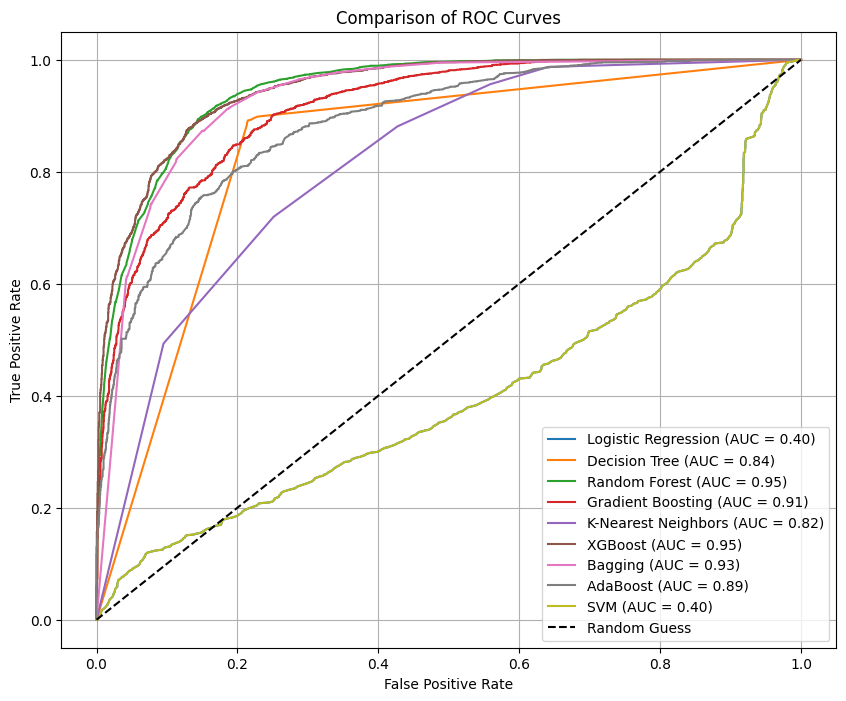

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ( BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC

# Sample the dataset for faster evaluation (optional)
X_train_sample = X_train.sample(frac=0.5, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Initialize models with parallel processing where applicable
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Bagging": BaggingClassifier(n_jobs=-1, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Store FPR, TPR, and AUC for each model
roc_data = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model (use sampled data for speed if needed)
    model.fit(X_train_sample, y_train_sample)

    # Get the predicted probabilities (or decision function if model doesn't support probabilities)
    if hasattr(model, "predict_proba"):   #if predict_proba exits
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
    elif hasattr(model, "decision_function"):
        y_prob = model.decision_function(X_test)
    else:
        print(f"{model_name} does not support probabilities, skipping ROC curve.")
        continue  # Skip models without probability output

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    roc_data[model_name] = (fpr, tpr, auc_score)
    print(f"{model_name} AUC: {auc_score:.2f}")

# Plot all ROC curves on the same graph
plt.figure(figsize=(10, 8))
for model_name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Plot the random guess line (diagonal)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparison of ROC Curves")
plt.legend()
plt.grid()
plt.show()


In [ ]:
!mkdir hotel


In [ ]:
%cd hotel


/content/hotel


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select `csv` from your local machine


Saving Hotel Reservations cancellation prediction.csv to Hotel Reservations cancellation prediction.csv


In [ ]:
%%writefile requirements.txt
pandas
numpy
matplotlib
seaborn
scikit-learn
imbalanced-learn
xgboost
tabulate
streamlit
joblib
imblearn


Writing requirements.txt


In [ ]:
!cat requirements.txt


pandas
numpy
matplotlib
seaborn
scikit-learn
imbalanced-learn
xgboost
tabulate
streamlit
joblib
imblearn


In [ ]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files

# Download app.py
files.download('app.py')

# Download requirements.txt
files.download('requirements.txt')

# Download dataset (if uploaded)
files.download('Hotel Reservations cancellation prediction.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Function to Load Data
@st.cache(allow_output_mutation=True)
def load_data():
    return pd.read_csv('Hotel Reservations cancellation prediction.csv')  # Update with your dataset name

# Function to Train and Save the Model
def train_and_evaluate_model(df):
    # Preprocessing and splitting
    X = df.drop(['booking_status', 'Booking_ID'], axis=1)  # Adjust based on dataset
    y = df['booking_status']

    categorical_features = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
    numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
            ('num', 'passthrough', numerical_features)
        ]
    )

    X_preprocessed = preprocessor.fit_transform(X)

    smote = SMOTE(random_state=42)
    X_balanced, y_balanced = smote.fit_resample(X_preprocessed, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
    )

    # Train the model
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    joblib.dump(pipeline, 'reservation_model.pkl')

    # Predictions and evaluation
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=False)
    confusion = confusion_matrix(y_test, y_pred)

    return accuracy, report, confusion

# Function to Load the Trained Model
@st.cache(allow_output_mutation=True)
def load_model():
    return joblib.load('reservation_model.pkl')

# Streamlit Web Interface
st.title("Hotel Reservation Cancellation Prediction")

# Step 1: Load Data
df = load_data()
st.subheader("Dataset Preview")
st.write(df.head())

# Step 2: Visualize Data
st.write("### Cancellation Distribution")
fig, ax = plt.subplots()
sns.countplot(x='booking_status', data=df, ax=ax)
ax.set_title("Canceled vs Not-Canceled Reservations")
st.pyplot(fig)

# Step 3: Train the Model
st.subheader("Model Training")
if st.button("Train Model"):
    with st.spinner("Training model..."):
        accuracy, report, confusion = train_and_evaluate_model(df)
    st.success(f"Model Trained Successfully! Accuracy: {accuracy:.2f}")
    st.text("Classification Report:")
    st.text(report)
    st.text("Confusion Matrix:")
    st.write(confusion)

# Step 4: Load the Trained Model
model = None
try:
    model = load_model()
except:
    st.warning("Please train the model first by clicking the 'Train Model' button.")

# Step 5: Make Predictions
st.subheader("Make a Prediction")
if model:
    # Collect user input for prediction
    no_of_adults = st.number_input('Number of Adults', min_value=1, max_value=10, value=2)
    no_of_children = st.number_input('Number of Children', min_value=0, max_value=5, value=0)
    no_of_weekend_nights = st.number_input('Number of Weekend Nights', min_value=0, max_value=7, value=1)
    no_of_week_nights = st.number_input('Number of Week Nights', min_value=0, max_value=14, value=2)
    lead_time = st.number_input('Lead Time (days)', min_value=0, max_value=500, value=50)
    no_of_special_requests = st.number_input('Number of Special Requests', min_value=0, max_value=5, value=0)
    type_of_meal_plan = st.selectbox('Type of Meal Plan', df['type_of_meal_plan'].unique())
    room_type_reserved = st.selectbox('Room Type Reserved', df['room_type_reserved'].unique())
    market_segment_type = st.selectbox('Market Segment Type', df['market_segment_type'].unique())

    # Add missing columns
    avg_price_per_room = st.number_input('Average Price per Room', min_value=0.0, value=100.0)
    repeated_guest = st.number_input('Repeated Guest', min_value=0, max_value=1, value=0)
    arrival_year = st.number_input('Arrival Year', min_value=2017, max_value=2025, value=2018)
    arrival_month = st.number_input('Arrival Month', min_value=1, max_value=12, value=10)
    arrival_date = st.number_input('Arrival Date', min_value=1, max_value=31, value=1)
    no_of_previous_bookings_not_canceled = st.number_input('Previous Bookings Not Canceled', min_value=0, value=0)
    required_car_parking_space = st.number_input('Required Car Parking Space', min_value=0, max_value=1, value=0)
    no_of_previous_cancellations = st.number_input('Previous Cancellations', min_value=0, value=0)

    if st.button("Predict Cancellation"):
        # Prepare input data for prediction
        input_data = pd.DataFrame({
            'no_of_adults': [no_of_adults],
            'no_of_children': [no_of_children],
            'no_of_weekend_nights': [no_of_weekend_nights],
            'no_of_week_nights': [no_of_week_nights],
            'lead_time': [lead_time],
            'no_of_special_requests': [no_of_special_requests],
            'type_of_meal_plan': [type_of_meal_plan],
            'room_type_reserved': [room_type_reserved],
            'market_segment_type': [market_segment_type],
            'avg_price_per_room': [avg_price_per_room],
            'repeated_guest': [repeated_guest],
            'arrival_year': [arrival_year],
            'arrival_month': [arrival_month],
            'arrival_date': [arrival_date],
            'no_of_previous_bookings_not_canceled': [no_of_previous_bookings_not_canceled],
            'required_car_parking_space': [required_car_parking_space],
            'no_of_previous_cancellations': [no_of_previous_cancellations]
        })

        try:
            # Use the trained pipeline to transform and predict
            prediction = model.predict(input_data)[0]
            prediction_proba = model.predict_proba(input_data)[0][1]

            # Display result
            if prediction == 1:
                st.error(f"**Reservation Canceled!** ")
            else:
                st.success(f"**Reservation Not Canceled.** ")
        except Exception as e:
            st.error(f"Error during prediction: {e}")


Writing app.py
